## CMPINF 2100 FINAL PROJECT - Clustering
### Travis Rogan
#### Pitt Athletics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pitt_df = pd.read_csv('pitt_athletics_cmpinf2100_project.csv')
pitt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   accountid           3360 non-null   int64  
 1   age                 1567 non-null   float64
 2   gender              582 non-null    object 
 3   distancemiles       3360 non-null   float64
 4   direction           3360 non-null   object 
 5   peak_drivetime      2958 non-null   float64
 6   offpeak_drivetime   2996 non-null   float64
 7   season              3360 non-null   int64  
 8   purchase_month      3360 non-null   object 
 9   purchase_dow        3360 non-null   object 
 10  price_type          3360 non-null   object 
 11  price_level         3360 non-null   object 
 12  ticket_count        3360 non-null   int64  
 13  price_per_ticket    3360 non-null   float64
 14  return_next_season  3360 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 393.9+

In [3]:
pitt_df_nm = pitt_df.copy()
#nm stands for "No Missings" in terms of the relevant data fields

In [4]:
pitt_df_nm.accountid = pitt_df_nm.accountid.astype('str')

In [5]:
pitt_df_nm.season = pitt_df_nm.season.astype('str')

In [6]:
pitt_df_nm.gender.fillna(value='(UNKNOWN)',inplace=True)
pitt_df_nm.gender.value_counts()

gender
(UNKNOWN)                  2778
Male                        464
Female                      100
Prefer not to say            13
Prefer to self-describe       5
Name: count, dtype: int64

In [7]:
pitt_df_nm['gender_known'] = np.where(pitt_df_nm.gender == '(UNKNOWN)', pitt_df_nm.gender, '(KNOWN)')

In [8]:
pitt_df_nm['lump_ticket_count'] = np.where( pitt_df.ticket_count > 4, '5 or more', pitt_df.ticket_count.astype('str') )


In [9]:
pitt_df_nm['y'] = np.where( pitt_df.return_next_season == 'YES', 1, 0 )

In [10]:
pitt_df_nm['bin_age'] = pd.cut( pitt_df.age, bins=2, include_lowest=True, ordered=False, labels=['A', 'B'])
pitt_df_nm.bin_age = pitt_df_nm.bin_age.astype('object')
pitt_df_nm.bin_age.value_counts(dropna=False)

bin_age
NaN    1793
A      1045
B       522
Name: count, dtype: int64

In [11]:
pitt_df_nm.bin_age.fillna(value='(UNKNOWN)', inplace=True)


In [12]:
pitt_df_nm['miles_log'] = np.log(pitt_df_nm.distancemiles)

In [13]:
pitt_df_nm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   accountid           3360 non-null   object 
 1   age                 1567 non-null   float64
 2   gender              3360 non-null   object 
 3   distancemiles       3360 non-null   float64
 4   direction           3360 non-null   object 
 5   peak_drivetime      2958 non-null   float64
 6   offpeak_drivetime   2996 non-null   float64
 7   season              3360 non-null   object 
 8   purchase_month      3360 non-null   object 
 9   purchase_dow        3360 non-null   object 
 10  price_type          3360 non-null   object 
 11  price_level         3360 non-null   object 
 12  ticket_count        3360 non-null   int64  
 13  price_per_ticket    3360 non-null   float64
 14  return_next_season  3360 non-null   object 
 15  gender_known        3360 non-null   object 
 16  lump_t

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
from sklearn.cluster import KMeans

In [16]:
KM_pitt_df = pitt_df_nm.dropna().copy()

In [17]:
KM_pitt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1411 entries, 2 to 3359
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   accountid           1411 non-null   object 
 1   age                 1411 non-null   float64
 2   gender              1411 non-null   object 
 3   distancemiles       1411 non-null   float64
 4   direction           1411 non-null   object 
 5   peak_drivetime      1411 non-null   float64
 6   offpeak_drivetime   1411 non-null   float64
 7   season              1411 non-null   object 
 8   purchase_month      1411 non-null   object 
 9   purchase_dow        1411 non-null   object 
 10  price_type          1411 non-null   object 
 11  price_level         1411 non-null   object 
 12  ticket_count        1411 non-null   int64  
 13  price_per_ticket    1411 non-null   float64
 14  return_next_season  1411 non-null   object 
 15  gender_known        1411 non-null   object 
 16  lump_ticket

In [18]:
pitt_numbers = KM_pitt_df.select_dtypes('number').copy()

In [30]:
pitt_numbers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1411 entries, 2 to 3359
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1411 non-null   float64
 1   distancemiles      1411 non-null   float64
 2   peak_drivetime     1411 non-null   float64
 3   offpeak_drivetime  1411 non-null   float64
 4   ticket_count       1411 non-null   int64  
 5   price_per_ticket   1411 non-null   float64
 6   y                  1411 non-null   int64  
 7   miles_log          1411 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 99.2 KB


In [19]:
X = StandardScaler().fit_transform(pitt_numbers)

In [20]:
X.shape

(1411, 8)

In [21]:
pitt_clusters_2 = KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).fit_predict(X)

In [22]:
KM_pitt_df_copy = KM_pitt_df.copy()

In [23]:
KM_pitt_df_copy['k2'] = pd.Series(pitt_clusters_2, index= KM_pitt_df_copy.index).astype('category')

In [24]:
KM_pitt_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1411 entries, 2 to 3359
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   accountid           1411 non-null   object  
 1   age                 1411 non-null   float64 
 2   gender              1411 non-null   object  
 3   distancemiles       1411 non-null   float64 
 4   direction           1411 non-null   object  
 5   peak_drivetime      1411 non-null   float64 
 6   offpeak_drivetime   1411 non-null   float64 
 7   season              1411 non-null   object  
 8   purchase_month      1411 non-null   object  
 9   purchase_dow        1411 non-null   object  
 10  price_type          1411 non-null   object  
 11  price_level         1411 non-null   object  
 12  ticket_count        1411 non-null   int64   
 13  price_per_ticket    1411 non-null   float64 
 14  return_next_season  1411 non-null   object  
 15  gender_known        1411 non-null   object 

In [25]:
KM_pitt_df_copy.k2.value_counts()

k2
1    1173
0     238
Name: count, dtype: int64

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


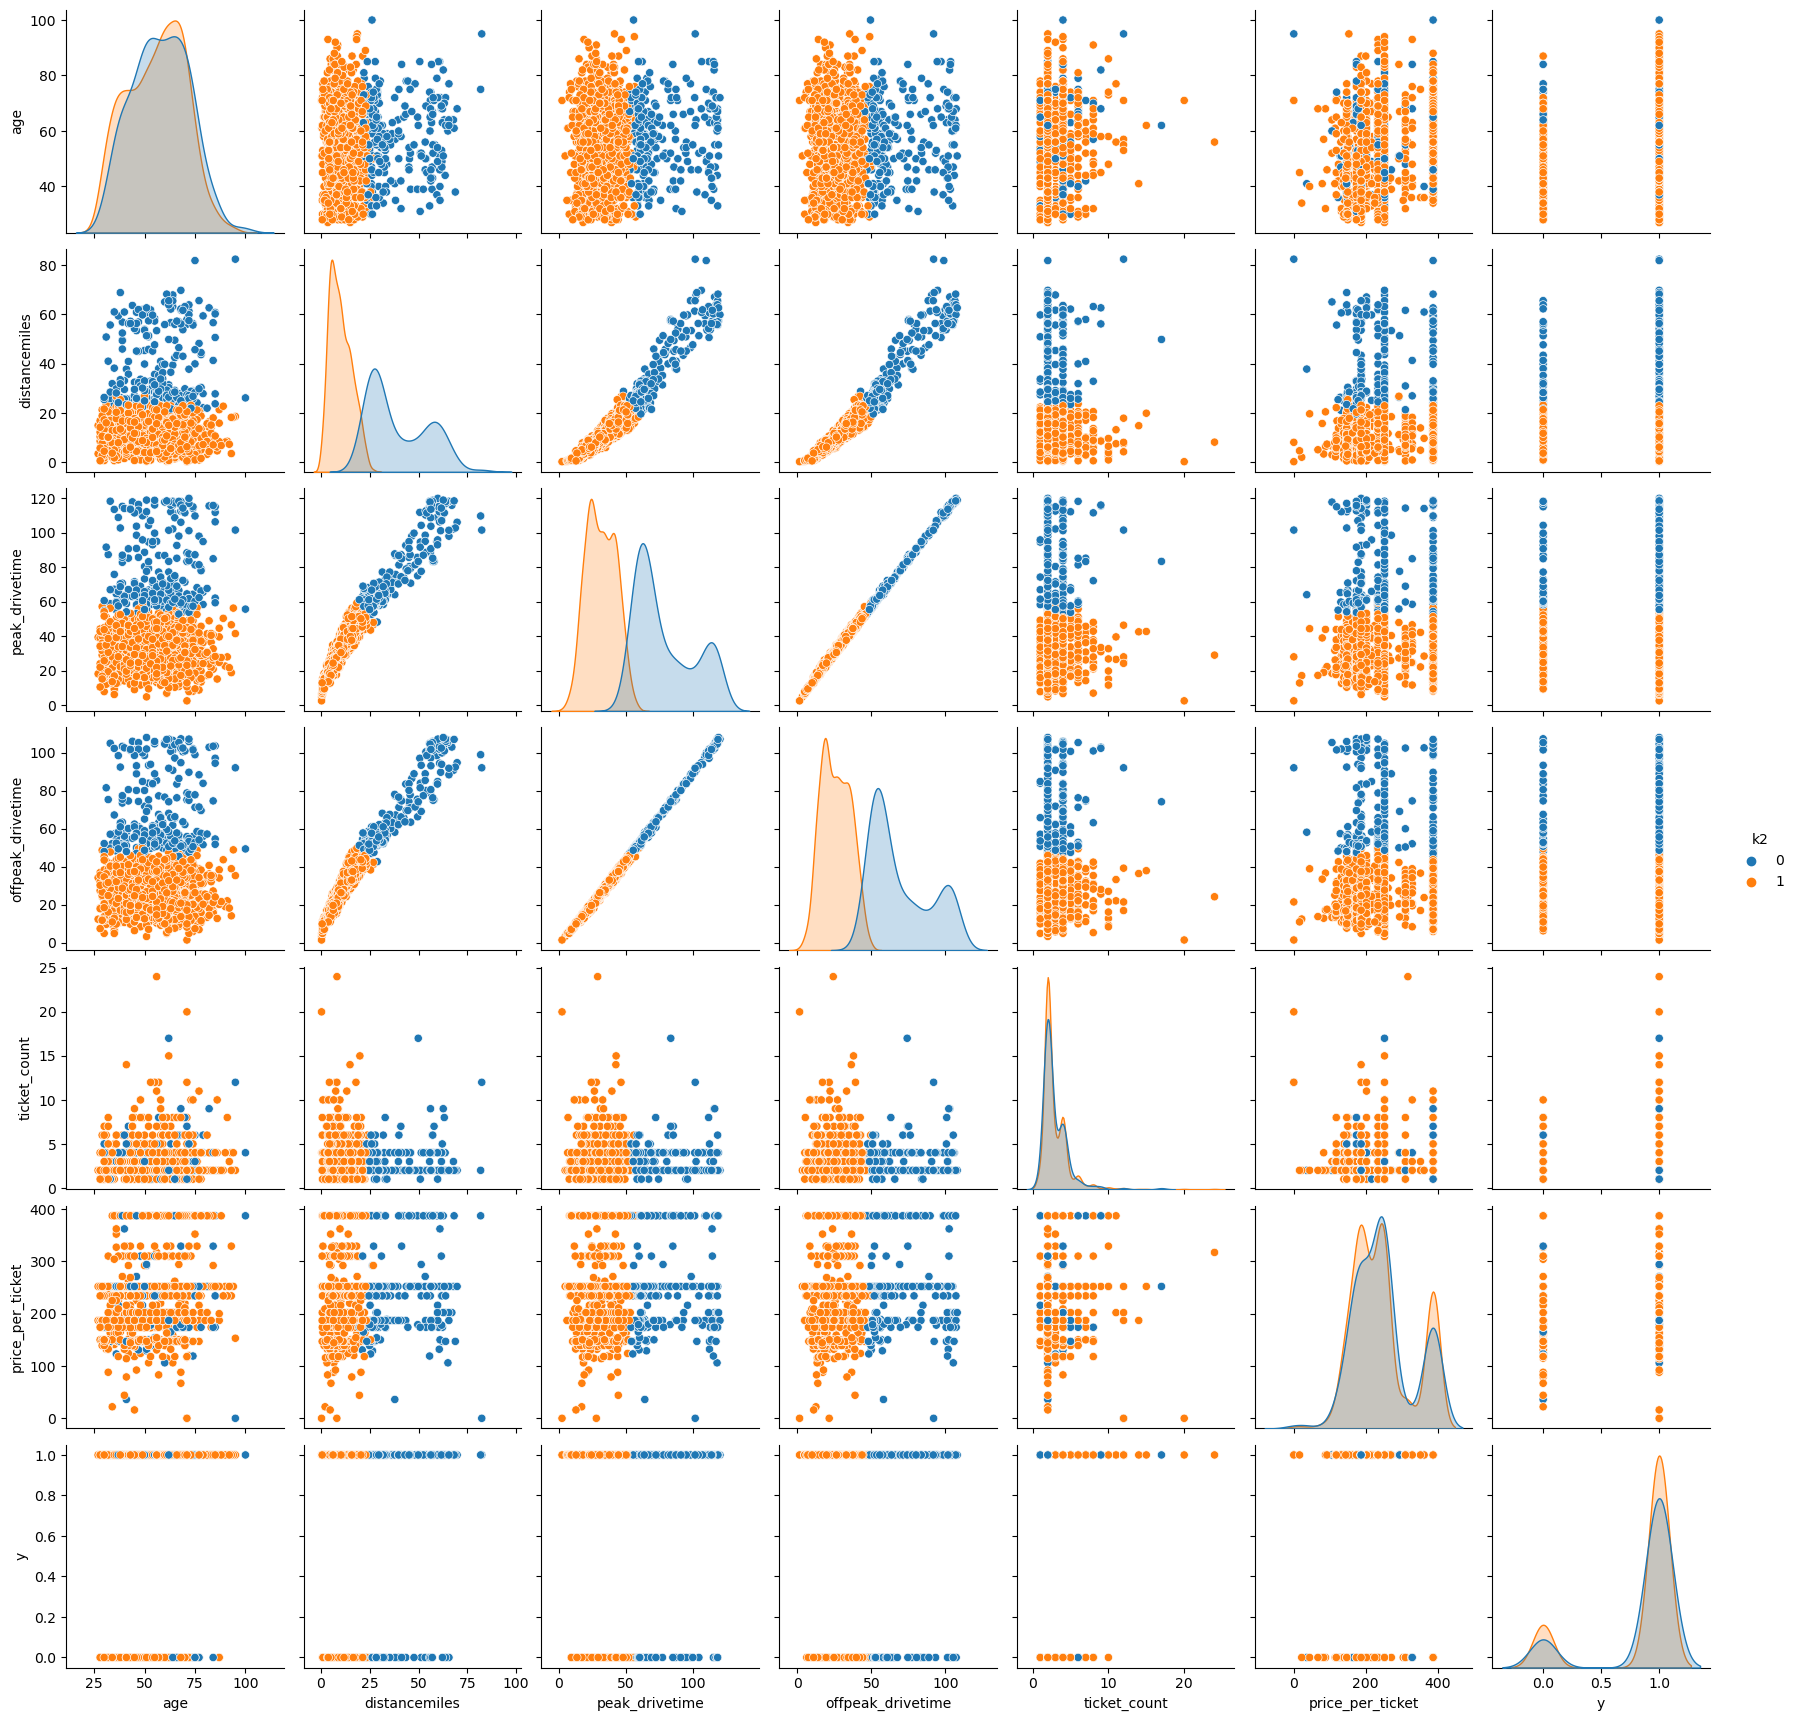

In [26]:
sns.pairplot(data = KM_pitt_df_copy, hue = 'k2',vars=['age', 'distancemiles', 'peak_drivetime', 'offpeak_drivetime', 'ticket_count', 'price_per_ticket', 'y'],diag_kws={'common_norm':False})

plt.show()

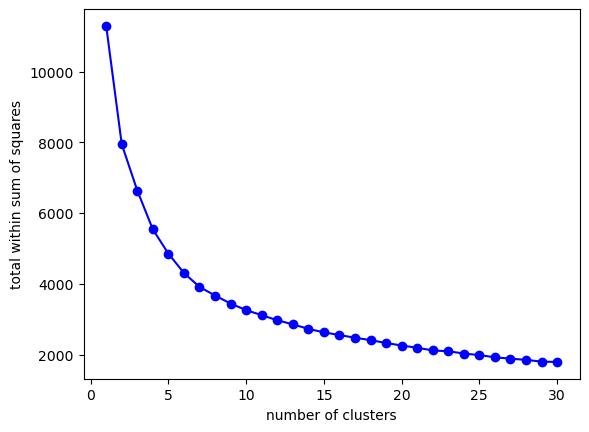

In [27]:
## Find the number of clusters with the knee bend

tots_within = []

K = range(1, 31)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit( X )
    
    tots_within.append( km.inertia_ )

fig, ax = plt.subplots()

ax.plot( K, tots_within, 'bo-' )
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

In [28]:
## 5 clusters looks like a good number, but we will go with 6 to keep it even

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


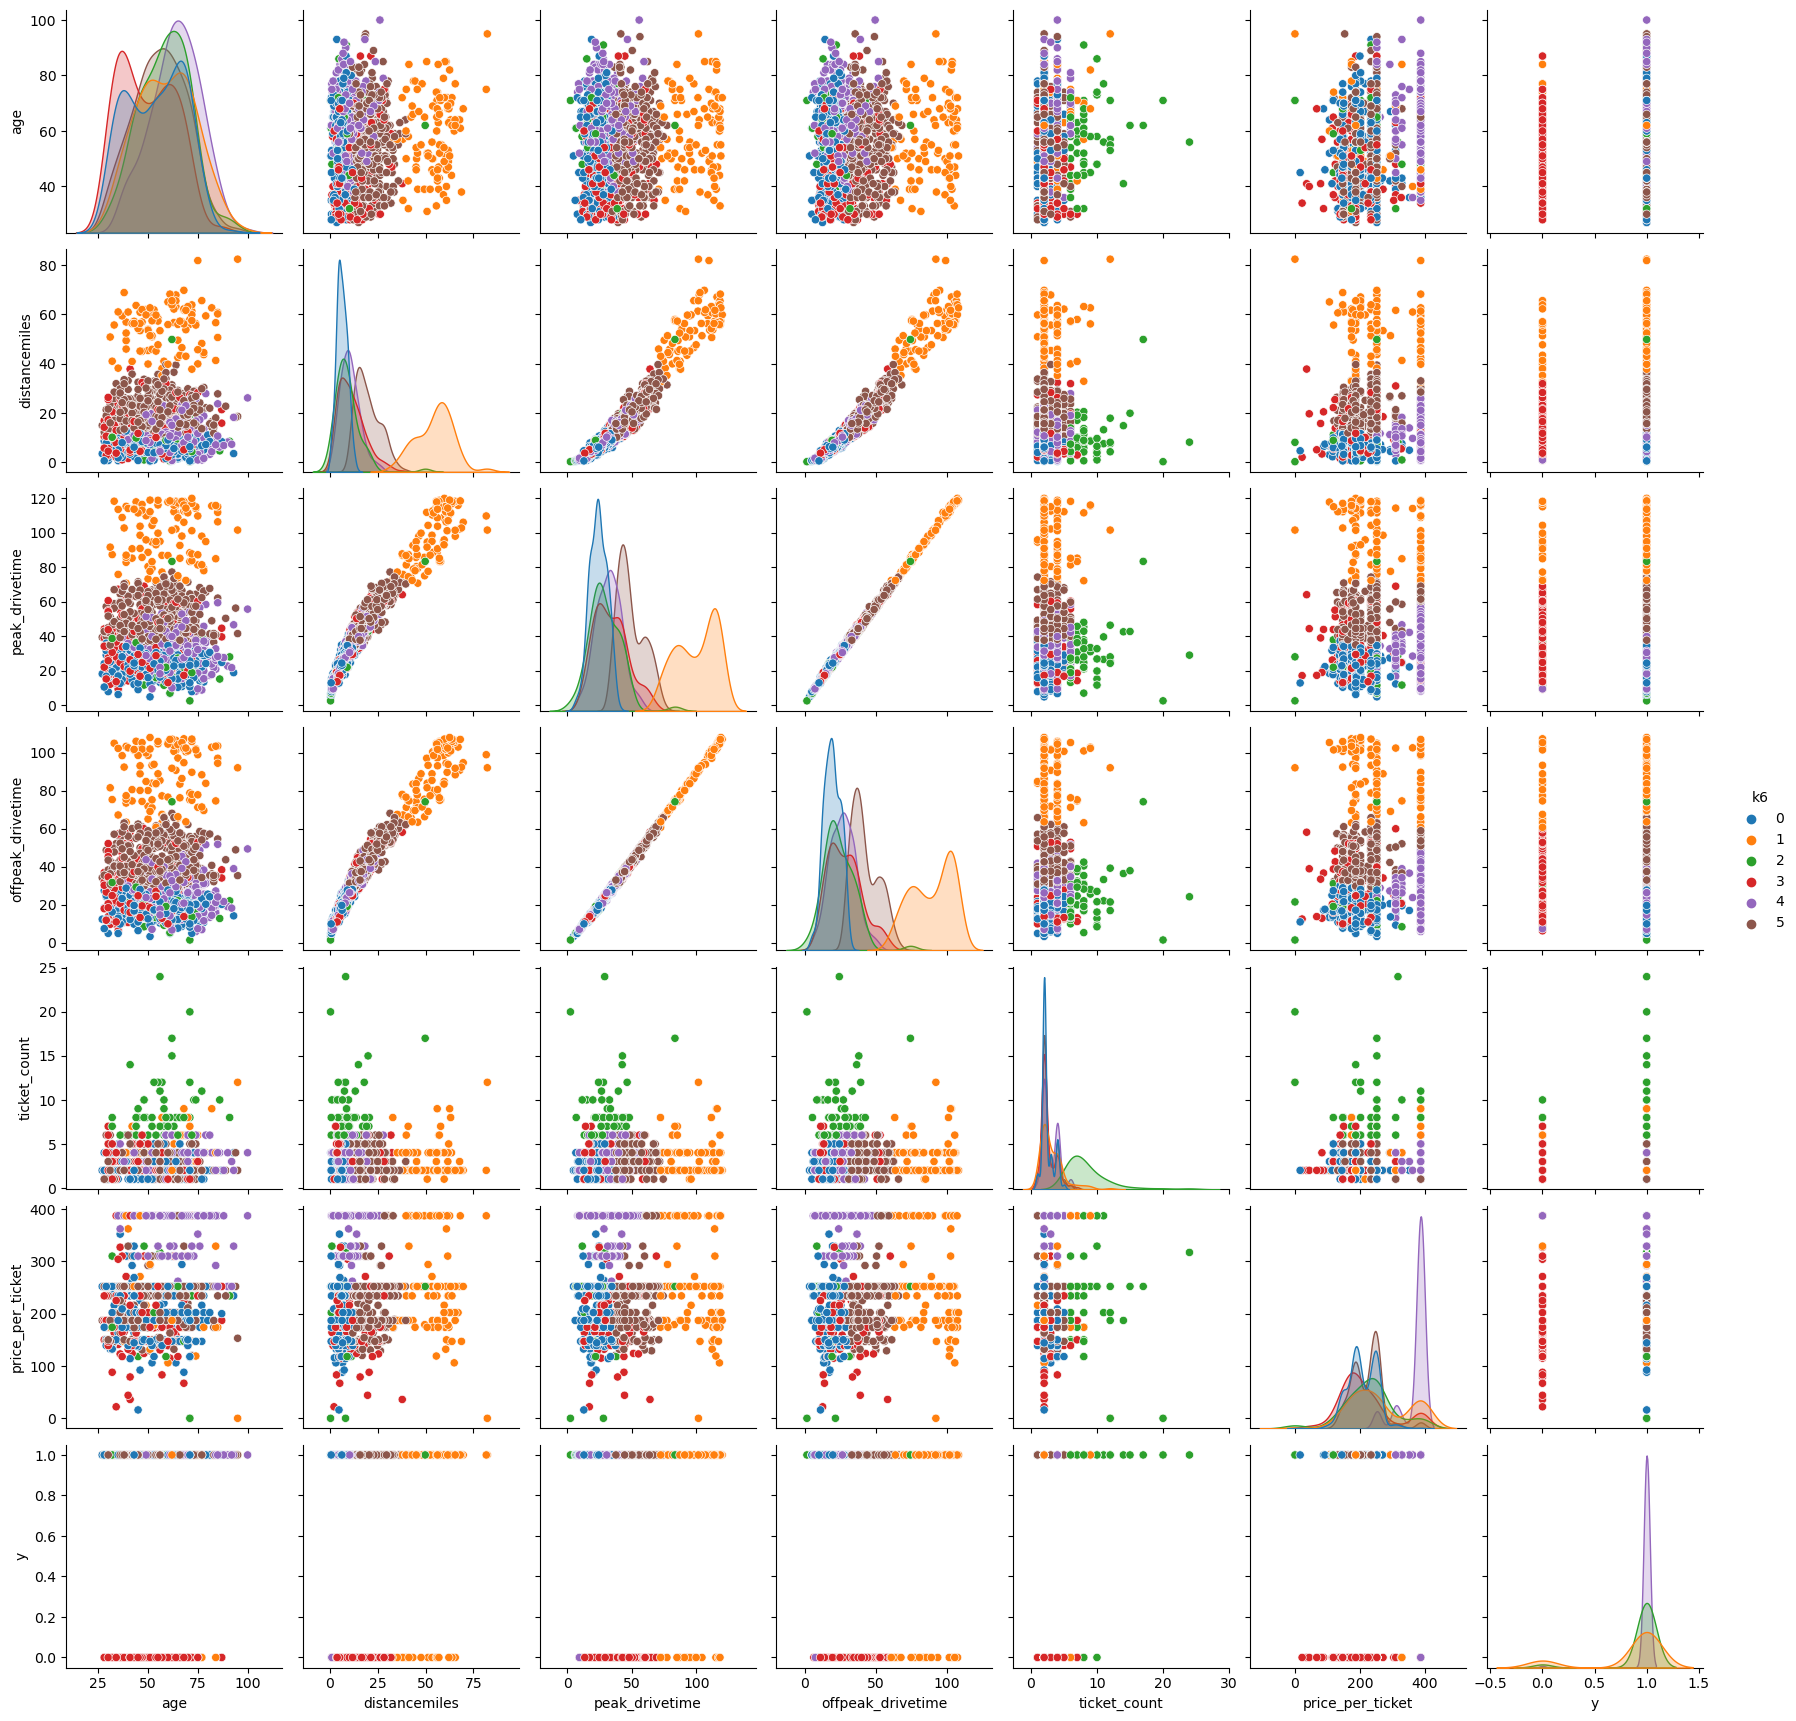

In [29]:
pitt_clusters_6 = KMeans(n_clusters=6, random_state=121, n_init=25, max_iter=500).fit_predict(X)
KM_pitt_df_copy['k6'] = pd.Series(pitt_clusters_6, index= KM_pitt_df_copy.index).astype('category')

sns.pairplot(data = KM_pitt_df_copy, hue = 'k6',vars=['age', 'distancemiles', 'peak_drivetime', 'offpeak_drivetime', 'ticket_count', 'price_per_ticket', 'y'],diag_kws={'common_norm':False})

plt.show()

Given the overlap of the clusters, this is not a helpful means of analysis for this problem